<a href="https://colab.research.google.com/github/aditya-524/fraud_det/blob/main/implemen_alpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fraud Detection
In this project, our goal is to construct a predictive model that can identify potentially fraudulent transactions for a financial organization. The insights derived from the model's analysis will be utilized to formulate a practical and effective strategy.

### Dataset Overview

In this project, we utilize a comprehensive dataset specifically curated for detecting fraudulent transactions.

The dataset is apparently generated using PaySim, a mobile money simulator that closely models real-world transactions. The dataset contains over 6 million transactions, each of which is described by 11 features. The features are as follows:
* `step`: the unit of time in real-world seconds.
* `type`: the type of transaction, which can be one of the following:
    *    `CASH-IN`,
    *    `CASH-OUT`,
    *    `DEBIT`,
    *    `PAYMENT`,
    *    `TRANSFER`.
* `amount`: the amount of the transaction in local currency.
* `nameOrig`: the customer who initiated the transaction.
* `oldbalanceOrg`: the customer's balance before the transaction.
* `newbalanceOrig`: the customer's balance after the transaction.
* `nameDest`: the recipient ID of the transaction.
* `oldbalanceDest`: the recipient's balance before the transaction.
* `newbalanceDest`: the recipient's balance after the transaction.
* `isFraud`: whether the transaction is fraudulent or not.
* `isFlaggedFraud`: whether the transaction is flagged as fraudulent by the system.

Reference :
<br>PaySim research paper
<br>*E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016*

### Libraries

In [3]:
# importing the necessary libraries
import pandas as pd
import numpy as np
from google.colab import drive

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Misc libraries
import warnings
warnings.filterwarnings("ignore")

### Data Acquisition

In [4]:
# importing the dataset

drive.mount('/content/drive')
frd = pd.read_csv("/content/drive/MyDrive/fraud.csv")
frd.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#Checking for Null Values
frd.isnull().values.any()

False

The dataset contains no missing values.

## Exploratory Data Analysis

### Representation of each attribute

In [6]:
frd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Here we know Column Name `type` is categorical data,

And `nameOrig` and `nameDest` is user specific object data.

Also the memory usage is 534.0+ MB so moving it into cloud a better idea.

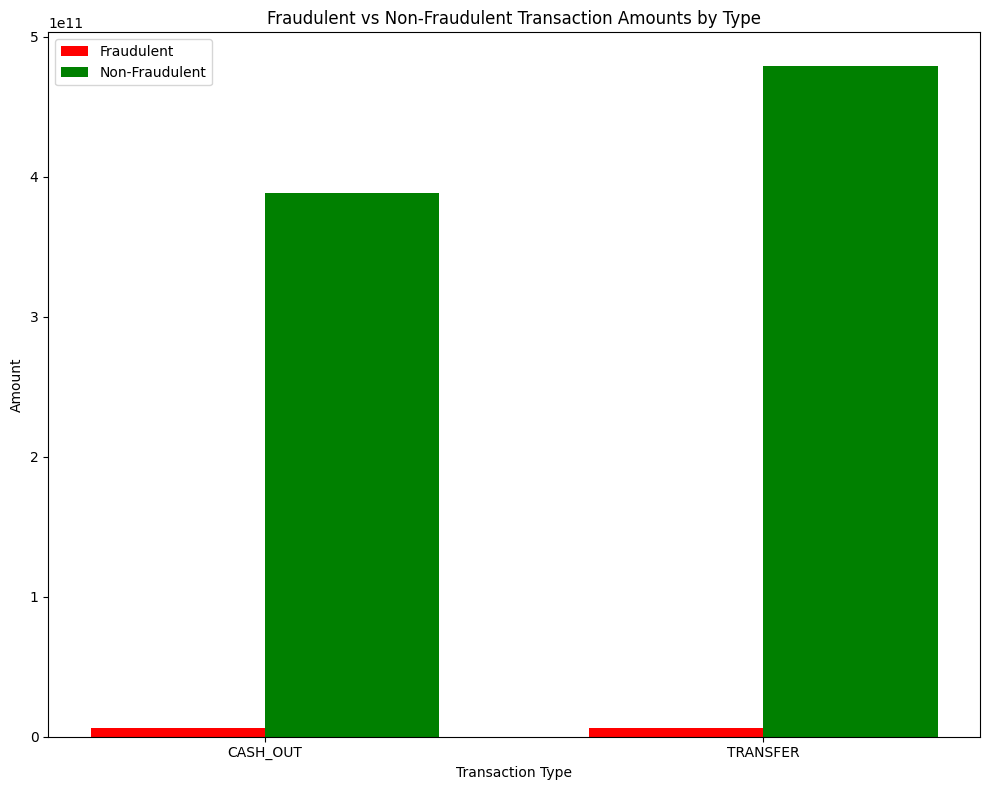

In [7]:
fraud_amounts = frd[frd['isFraud'] == 1].groupby('type')['amount'].sum().reset_index(name='Fraud Amount')
non_fraud_amounts = frd[frd['isFraud'] == 0].groupby('type')['amount'].sum().reset_index(name='Non-Fraud Amount')

# Merge the two DataFrames on 'type'
merged_amounts = pd.merge(fraud_amounts, non_fraud_amounts, on='type')

# Now we plot the grouped bar chart
plt.figure(figsize=(10, 8))
bar_width = 0.35
index = np.arange(len(merged_amounts['type']))

bar1 = plt.bar(index, merged_amounts['Fraud Amount'], bar_width, label='Fraudulent', color='red')
bar2 = plt.bar(index + bar_width, merged_amounts['Non-Fraud Amount'], bar_width, label='Non-Fraudulent', color='green')

plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.title('Fraudulent vs Non-Fraudulent Transaction Amounts by Type')
plt.xticks(index + bar_width / 2, merged_amounts['type'])
plt.legend()
plt.tight_layout()
plt.show()

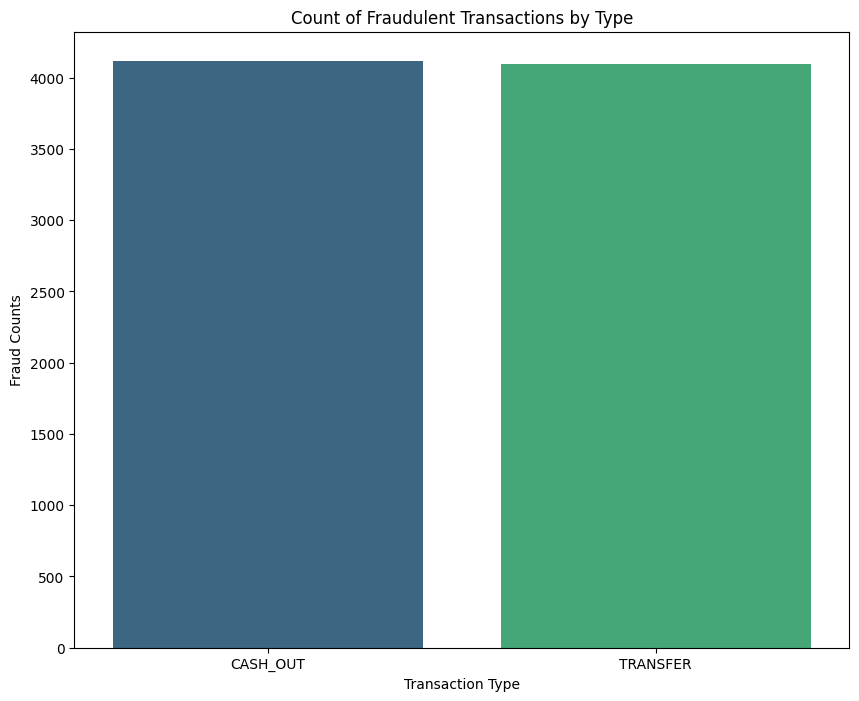

In [8]:
# Count the number of fraudulent transactions by type
fraud_counts = frd[frd['isFraud'] == 1].groupby('type').size().reset_index(name='Counts')

# Plot a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='type', y='Counts', data=fraud_counts, palette='viridis')

plt.xlabel('Transaction Type')
plt.ylabel('Fraud Counts')
plt.title('Count of Fraudulent Transactions by Type')
plt.show()


In [ ]:
# Assuming 'isFlaggedFraud' is a column in your DataFrame that flags possible frauds.
plt.figure(figsize=(10, 8))
sns.scatterplot(x=frd.index, y='amount', data=frd, hue='isFlaggedFraud', palette='coolwarm', alpha=0.6)

plt.xlabel('Transaction Index')
plt.ylabel('Amount')
plt.title('Transaction Amounts with Fraud Flags')
plt.legend(title='Is Flagged Fraud')
plt.show()


count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64


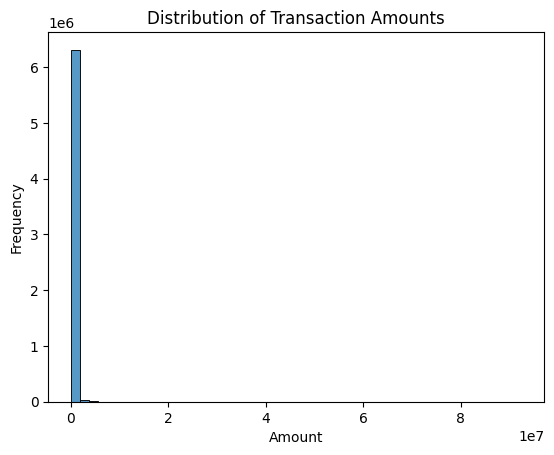

In [ ]:

print(frd['amount'].describe())

print(frd['amount'].describe())
sns.histplot(frd['amount'], bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

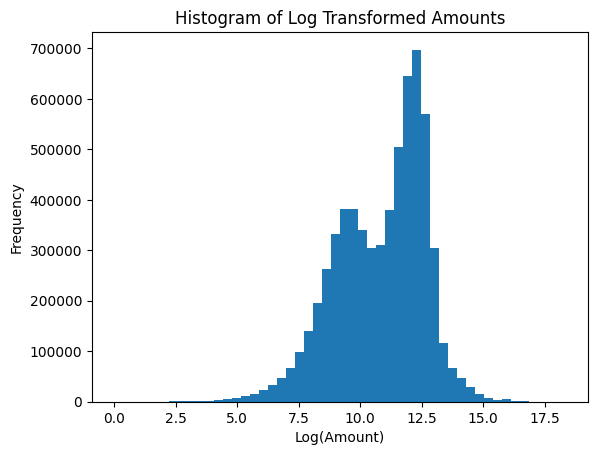

In [ ]:
frd['log_amount'] = np.log(frd['amount'] + 1)  # Adding 1 to avoid log(0)

plt.hist(frd['log_amount'], bins=50)
plt.xlabel('Log(Amount)')
plt.ylabel('Frequency')
plt.title('Histogram of Log Transformed Amounts')
plt.show()